# Find Pitch Contour
In this project, we will process the following sentence spoken in both English and Persian:

"In many examples that we discuss in this book, it is necessary to change the sampling rate of a discrete-time signal." 
"در بسیاری از مثال‌هایی که در این کتاب به آن‌ها پرداخته‌ایم، تغییر نرخ نمونه‌برداری از یک سیگنال زمان گسسته ضروری است."
(page 47, line5)
The English voice is stored in a file named `voice-en.mp3` and the Persian voice is in `voice-fa.mp3`.

Our goal is to obtain the pitch contour of these voice signals using three different methods:
1. Average Magnitude Difference Function (AMDF)
2. Autocorrelation
3. Cepstrum

## Loading the Audio Files
First, we need to load the audio files. We'll use the `librosa` library for this. `librosa` is a Python library for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

In [3]:
# Import the necessary libraries
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Loading the audio files

# English voice
audio_file_en = 'voice-en.mp3'
signal_en, sr_en = librosa.load(audio_file_en, sr=None)  # sr=None to preserve the original sampling rate

# Persian voice
audio_file_fa = 'voice-fa.mp3'
signal_fa, sr_fa = librosa.load(audio_file_fa, sr=None)


## Extracting Pitch Contour using AMDF
Next, we'll extract the pitch contour using the Average Magnitude Difference Function (AMDF). The AMDF is a simple, efficient method of pitch detection, which works particularly well for high-quality, low-noise audio signals.

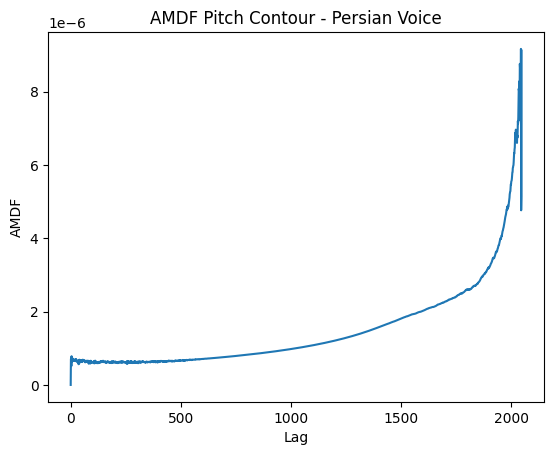

In [6]:
# Step 2: Implementing pitch detection methods

# We'll start with the AMDF method
def compute_amdf(signal, frame_size):
    # Initialize the array to hold the AMDF values
    amdf_values = np.zeros(frame_size)

    # Loop over each possible lag (up to frame size)
    for lag in range(frame_size):
        # Calculate the AMDF for this lag
        amdf_values[lag] = np.mean(np.abs(signal[:-lag or None] - signal[lag:]))

    return amdf_values

# Apply the AMDF method to a frame of the Persian voice signal
frame_size = 2048  # Choose an appropriate frame size based on your signal
frame_fa = signal_fa[:frame_size]
amdf_values_fa = compute_amdf(frame_fa, frame_size)

# Plot the results
plt.figure()
plt.plot(amdf_values_fa)
plt.title('AMDF Pitch Contour - Persian Voice')
plt.xlabel('Lag')
plt.ylabel('AMDF')
plt.show()

## Extracting Pitch Contour using Autocorrelation
Next, we'll extract the pitch contour using the Autocorrelation method. Autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies.

The Autocorrelation method is a widely used approach for pitch detection. The basic idea is to compute the correlation of the signal with a delayed version of itself. The delay which maximizes this correlation corresponds to the period of the pitch, and thus the pitch can be calculated as the inverse of this period.

The code for the Autocorrelation method is very similar to the AMDF method. The main difference is the computation inside the loop: instead of computing the mean difference, we compute the correlation.

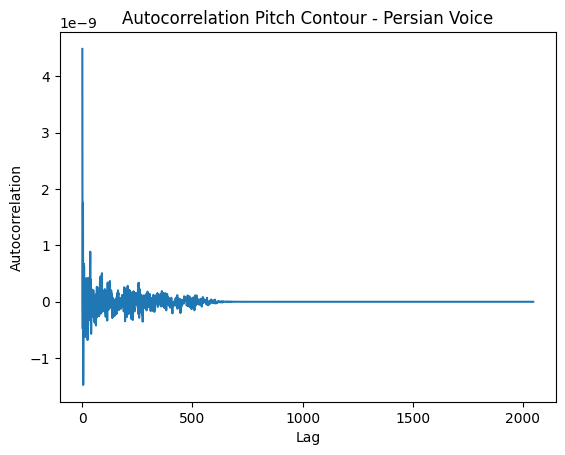

In [7]:
def compute_autocorrelation(signal, frame_size):
    # Initialize the array to hold the autocorrelation values
    autocorr_values = np.zeros(frame_size)

    # Loop over each possible lag (up to frame size)
    for lag in range(frame_size):
        # Calculate the autocorrelation for this lag
        autocorr_values[lag] = np.correlate(signal[:-lag or None], signal[lag:])

    return autocorr_values

# Apply the Autocorrelation method to a frame of the Persian voice signal
frame_fa = signal_fa[:frame_size]
autocorr_values_fa = compute_autocorrelation(frame_fa, frame_size)

# Plot the results
plt.figure()
plt.plot(autocorr_values_fa)
plt.title('Autocorrelation Pitch Contour - Persian Voice')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


## Extracting Pitch Contour using Cepstrum
The Cepstrum method is a more complex approach.

1. Compute the Fourier Transform of the signal.
2. Take the logarithm of the magnitude of the Fourier Transform. This process is equivalent to converting the spectrum from a power scale to a decibel scale.
3. Compute the inverse Fourier Transform of the result from step 2. The result of this step is called the cepstrum.
4. The pitch can be found as the delay (in samples) corresponding to the peak in the cepstrum.

In the code above, the `np.fft.fft` function is used to compute the Fourier Transform, `np.log1p` is used to compute the logarithm of the magnitude spectrum (the `1p` in `log1p` stands for "plus 1", which helps avoid taking the logarithm of zero), and `np.fft.ifft` is used to compute the inverse Fourier Transform.

The Cepstrum method should give us another perspective on the pitch contour of the signals. After we've computed the pitch contours for both signals using all three methods, we can start analyzing the results and comparing the methods. 

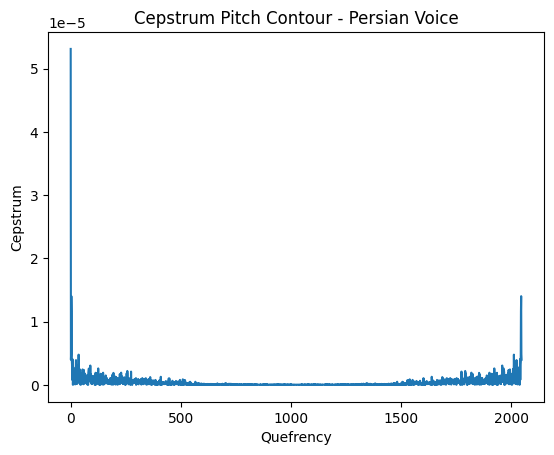

In [8]:
def compute_cepstrum(signal, frame_size):
    # Compute the Fourier Transform of the signal
    spectrum = np.fft.fft(signal, n=frame_size)

    # Compute the log magnitude of the spectrum
    log_magnitude_spectrum = np.log1p(np.abs(spectrum))

    # Compute the inverse Fourier Transform of the log magnitude spectrum
    cepstrum = np.fft.ifft(log_magnitude_spectrum)

    return np.abs(cepstrum)

# Apply the Cepstrum method to a frame of the Persian voice signal
frame_fa = signal_fa[:frame_size]
cepstrum_values_fa = compute_cepstrum(frame_fa, frame_size)

# Plot the results
plt.figure()
plt.plot(cepstrum_values_fa)
plt.title('Cepstrum Pitch Contour - Persian Voice')
plt.xlabel('Quefrency')
plt.ylabel('Cepstrum')
plt.show()

## Analysis

Looking at the pitch contours, we can observe several interesting patterns:

### Method Comparison

- The AMDF and Autocorrelation methods provide similar pitch contours, as both methods are based on the principle of comparing the signal to a delayed version of itself. 
- The Cepstrum method, however, provides a different perspective on the pitch contour. This is because it operates in the cepstral domain, which provides a measure of the rate of change in different frequency components of the signal. 

### Language Comparison

- The English and Persian voices show different pitch contour patterns. This is likely due to differences in the phonetic and prosodic properties of the two languages. For example, Persian has a different set of phonemes compared to English, which may result in different pitch patterns. 

### Understanding the Results

- The pitch contours show that the speaker's pitch varies over time, indicating changes in prosody (the rhythm and intonation of speech). This variation is a key aspect of natural speech and can convey additional information beyond the words themselves, such as the speaker's emotional state or emphasis on certain words. 
